# Question 2

In [1]:
# Necassary imports
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat # to be able to use .mat file in the python environment

In [2]:
# QUESTION 2
print('QUESTION 2\n')

QUESTION 2



In [3]:
data = loadmat('c2p3.mat')
counts = data['counts'].flatten()
print('Dimension of counts:', np.shape(counts))
stim = data['stim']
print('Dimension of stim:', np.shape(stim), '\n')

Dimension of counts: (32767,)
Dimension of stim: (16, 16, 32767) 



In [4]:
# PART A 
print('PART A\n')

PART A



In [5]:
NUM_STEPS = 10

In [6]:
def STA(counts, stim, num_steps):
    """
    Given spike and stimulus data, performs Spike Triggered 
    Averaging (STA). STA is performed by computing a weighted
    averaging "num_steps" individual intervals of the stimulus.
    Returns the averages after the computation.
    Args:
        counts: The spike counts
        stim: The stimulus data
        num_steps: Number of individual intervals, in which STA 
            will be computed
    Returns:
        averages: The resulting averages.
    """
    averages = np.zeros((np.shape(stim)[0], np.shape(stim)[1], num_steps))
    for i in range(np.size(counts)):
        for j in range(num_steps):
            if i > j:
                averages[:,:, j] += stim[:,:, i - 1 - j] * counts[i]
    averages /= np.sum(counts)
    return averages

In [7]:
STAs = STA(counts, stim, NUM_STEPS)

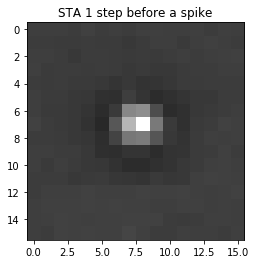

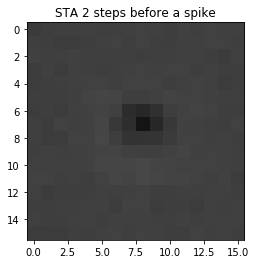

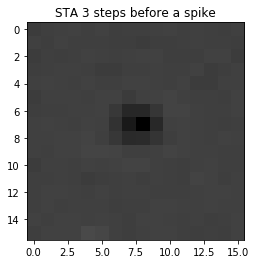

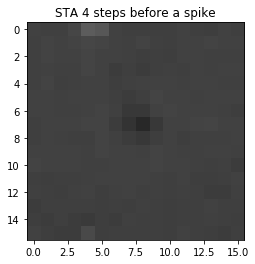

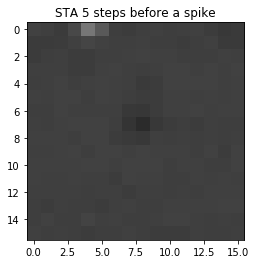

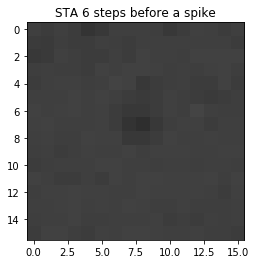

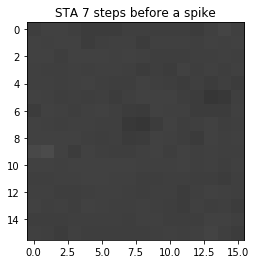

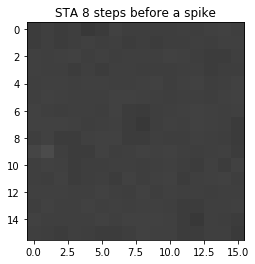

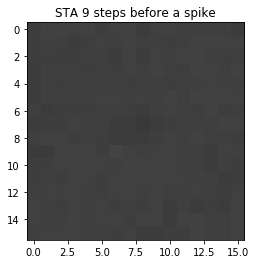

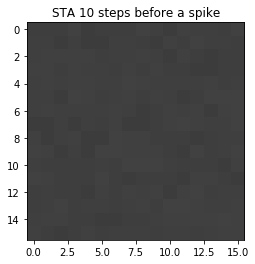

In [8]:
# Find the range of pixels that cover all STAs
min_pixel = np.min(STAs)
max_pixel = np.max(STAs)
figure_num = 1
for i in range(NUM_STEPS):
    plt.figure(figure_num)
    figure_num += 1
    plt.imshow(STAs[:,:, i], cmap='gray', vmin=min_pixel, vmax=max_pixel)
    step_or_steps = 'steps' if i != 0 else 'step'
    plt.title('STA %d %s before a spike' % ((i + 1), step_or_steps))
    plt.show(block=False)

In [9]:
# PART B 
print('PART B\n')

PART B



In [10]:
row_summed_avgs = np.sum(STAs, axis=0) # sum across rows 
col_summed_avgs = np.sum(STAs, axis=1) # sum across columns 

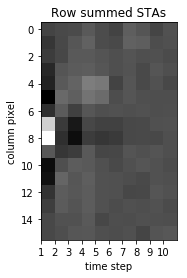

In [11]:
plt.figure(figure_num)
figure_num += 1
plt.imshow(row_summed_avgs, cmap='gray')
plt.title('Row summed STAs')
plt.ylabel('column pixel')
plt.xlabel('time step')
x_left, x_right = plt.xlim()
plt.xticks(np.arange(x_left, x_right, 1), np.arange(1, 11))
plt.show(block=False)

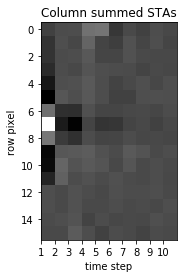

In [12]:
plt.figure(figure_num)
figure_num += 1
plt.imshow(col_summed_avgs, cmap='gray')
plt.title('Column summed STAs')
plt.ylabel('row pixel')
plt.xlabel('time step')
plt.xticks(np.arange(x_left, x_right, 1), np.arange(1, 11))
plt.show(block=False)

In [13]:
# PART C 
print('PART C\n')

PART C



In [14]:
stim_projections = np.zeros(np.size(counts))
for i in range(np.size(counts)):
    stim_projections[i] = np.sum(STAs[:,:, 0] * stim[:,:, i])
stim_projections /= np.max(stim_projections)

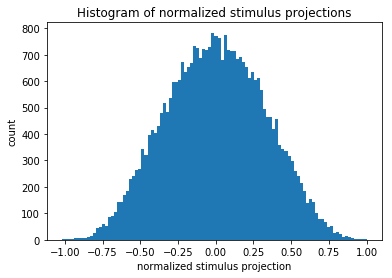

In [15]:
plt.figure(figure_num)
figure_num += 1
plt.hist(stim_projections, bins=100)
plt.title('Histogram of normalized stimulus projections')
plt.ylabel('count')
plt.xlabel('normalized stimulus projection')
plt.show(block=False)

In [16]:
nonzero_stim_indices = np.where(counts != 0)[0]
nonzero_stim_projs = np.zeros(np.size(nonzero_stim_indices))
for i in range(np.size(nonzero_stim_projs)):
    nz = nonzero_stim_indices[i]
    if nz >= 1:
        nonzero_stim_projs[i] = np.sum(STAs[:,:, 0] * stim[:,:, nz - 1])
nonzero_stim_projs /= np.max(nonzero_stim_projs)

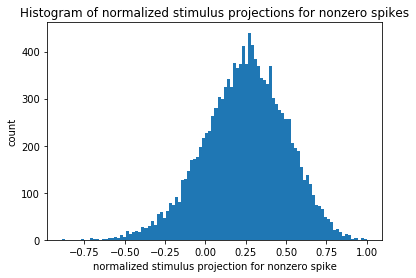

In [17]:
plt.figure(figure_num)
figure_num += 1
plt.hist(nonzero_stim_projs, bins=100)
plt.title('Histogram of normalized stimulus projections for nonzero spikes')
plt.ylabel('count')
plt.xlabel('normalized stimulus projection for nonzero spike')
plt.show(block=False)

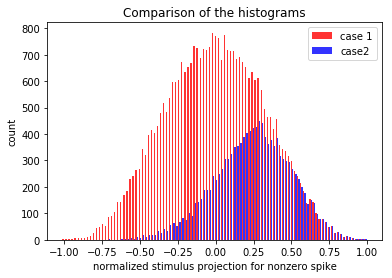

In [34]:
plt.figure(figure_num)
figure_num += 1
plt.hist([stim_projections, nonzero_stim_projs],
         color=['r', 'b'], alpha=0.8, label=['case 1', 'case2'], bins=100)
plt.legend()
plt.title('Comparison of the histograms')
plt.ylabel('count')
plt.xlabel('normalized stimulus projection for nonzero spike')
plt.show(block=False)

In [33]:
plt.show()